In [1]:
# Section 1: Import Libraries and Load Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the CSV file
try:
    df = pd.read_csv('StudentPerformanceFactors.csv')
    print("Dataset loaded successfully!")
    print("First 5 rows of the dataset:")
    print(df.head())
except FileNotFoundError:
    print("Error: 'StudentPerformanceFactors.csv' not found.")
    print("Please make sure the dataset file is in the same directory as your script.")

Dataset loaded successfully!
First 5 rows of the dataset:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_

In [2]:
# Section 2: Comprehensive Data Diagnosis

print("\n" + "="*50)
print(" " * 15, "DATA DIAGNOSIS REPORT")
print("="*50 + "\n")

# 1. Shape of the dataset (rows, columns)
print("1. Dataset Shape:")
print(f"   Rows: {df.shape[0]}, Columns: {df.shape[1]}\n")

# 2. Data types and non-null counts
print("2. Data Types and Non-Null Counts:")
# .info() is a powerful command that gives a concise summary of the DataFrame.
df.info()

# 3. Explicit count of missing values per column
print("\n3. Missing Values Count per Column:")
missing_values = df.isnull().sum()
# We only display columns that actually have missing values to keep the report clean.
print(missing_values[missing_values > 0])

# 4. Statistical summary for numerical columns
print("\n4. Statistical Summary for Numerical Columns:")
# .describe() provides key stats like mean, std dev, min, max, and percentiles.
# This is excellent for spotting outliers or anomalies.
print(df.describe())

print("\n" + "="*50)
print(" " * 12, "END OF DIAGNOSIS REPORT")
print("="*50 + "\n")


                DATA DIAGNOSIS REPORT

1. Dataset Shape:
   Rows: 6607, Columns: 20

2. Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-nu

In [4]:
# Section 3 (Revised): Upgraded Data Cleaning and Imputation Pipeline

print("\n" + "="*50)
print(" " * 10, "DATA CLEANING & IMPUTATION")
print("="*50 + "\n")

# 1. Identify numerical and categorical columns
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.tolist()

if 'Exam_Score' in numerical_features:
    numerical_features.remove('Exam_Score')

print(f"Identified {len(numerical_features)} numerical features.")
print(f"Identified {len(categorical_features)} categorical features.\n")

# 2. Apply Imputation using modern, explicit syntax
for col in numerical_features:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        # Recommended way: df[col] = df[col].method(value)
        df[col] = df[col].fillna(median_val)
        print(f"Filled missing values in numerical column: {col} with median ({median_val})")

for col in categorical_features:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        # Recommended way: df[col] = df[col].method(value)
        df[col] = df[col].fillna(mode_val)
        print(f"Filled missing values in categorical column: {col} with mode ('{mode_val}')")

# 3. Final Verification
final_missing_values = df.isnull().sum().sum()
if final_missing_values == 0:
    print("\nVerification successful: There are no more missing values in the dataset.")
else:
    print(f"\nWarning: There are still {final_missing_values} missing values remaining.")

print("\n" + "="*50)
print(" " * 15, "CLEANING COMPLETE")
print("="*50 + "\n")


           DATA CLEANING & IMPUTATION

Identified 6 numerical features.
Identified 13 categorical features.


Verification successful: There are no more missing values in the dataset.

                CLEANING COMPLETE




      EXPLORATORY DATA ANALYSIS (EDA)

Displaying plot 1: Distribution of Exam Scores...


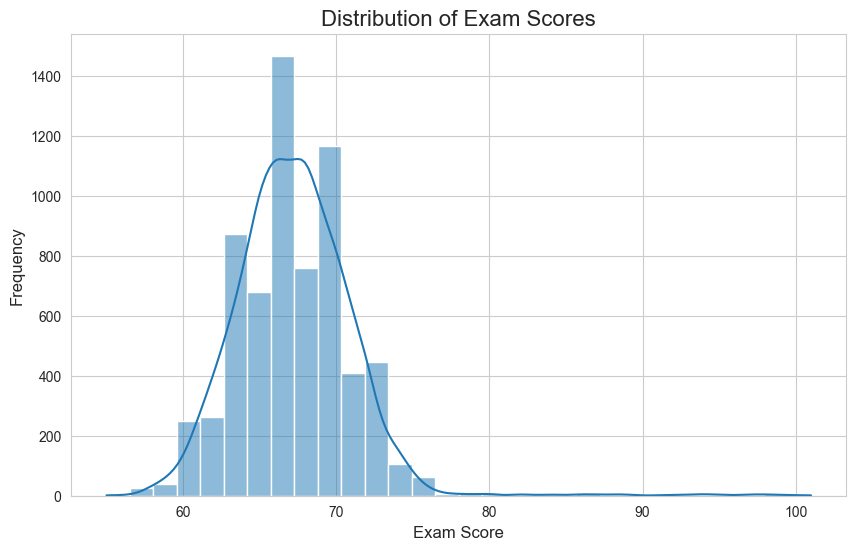

Displaying plots for numerical features vs. Exam Score...


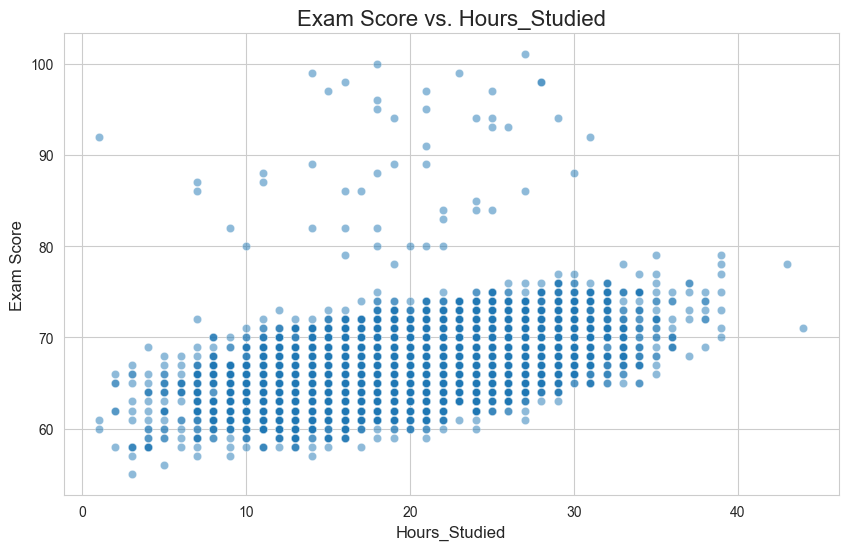

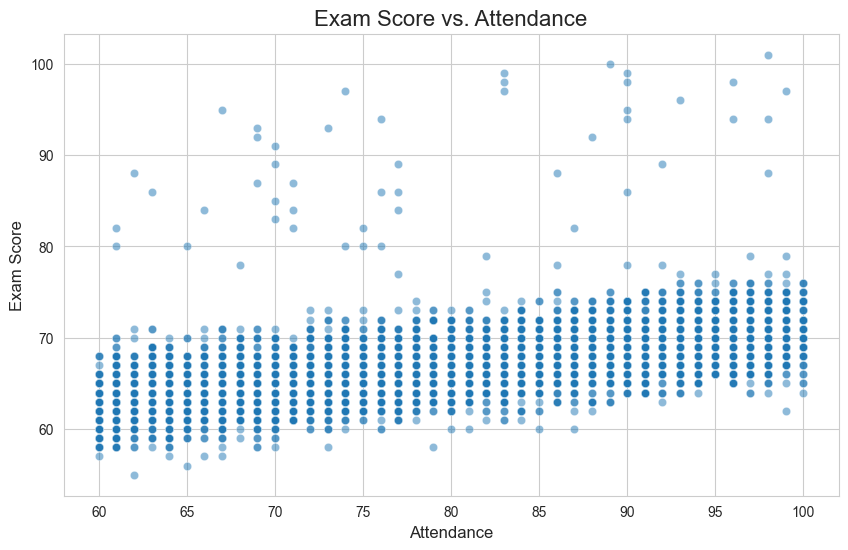

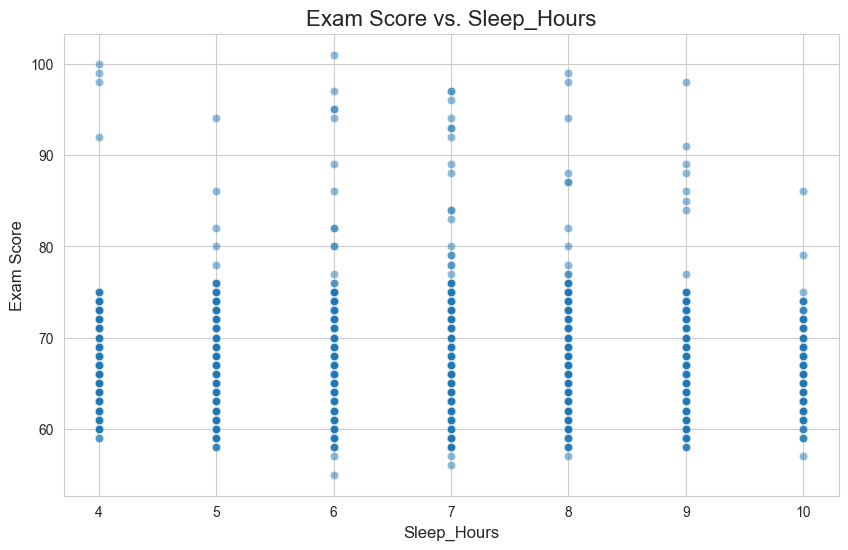

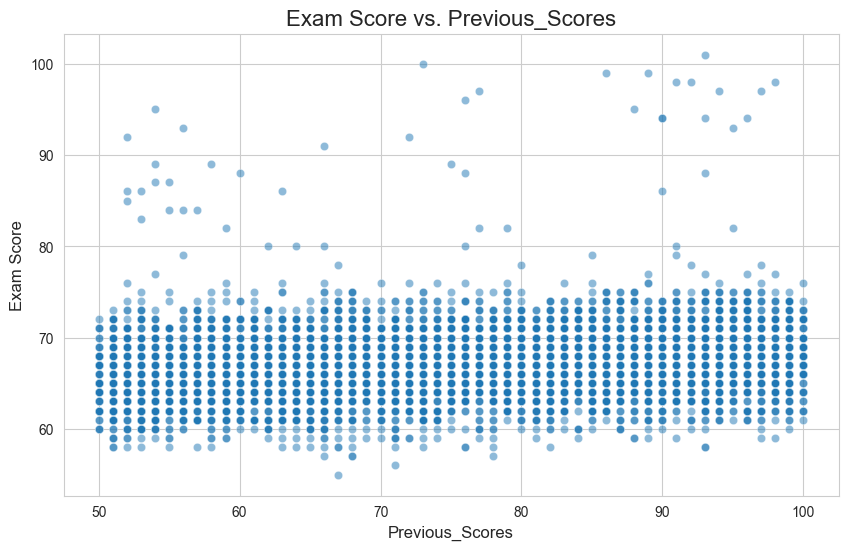

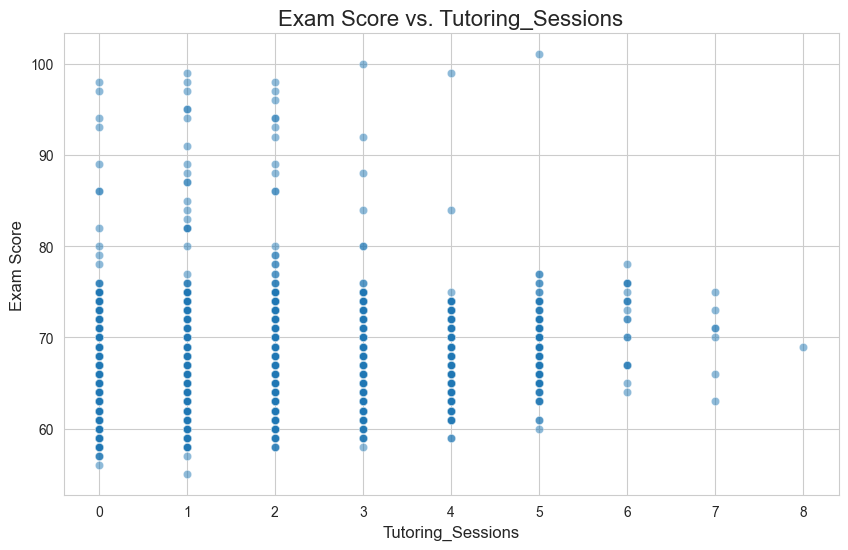

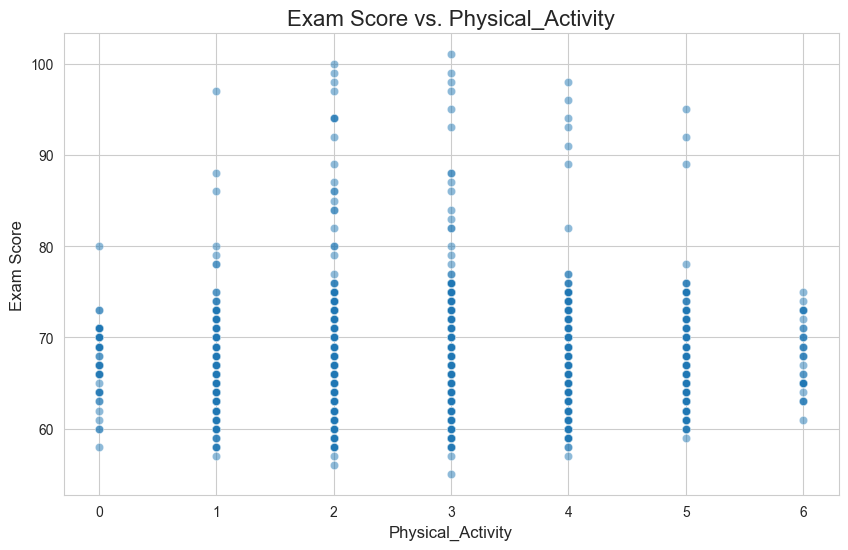

Displaying plots for categorical features vs. Exam Score...


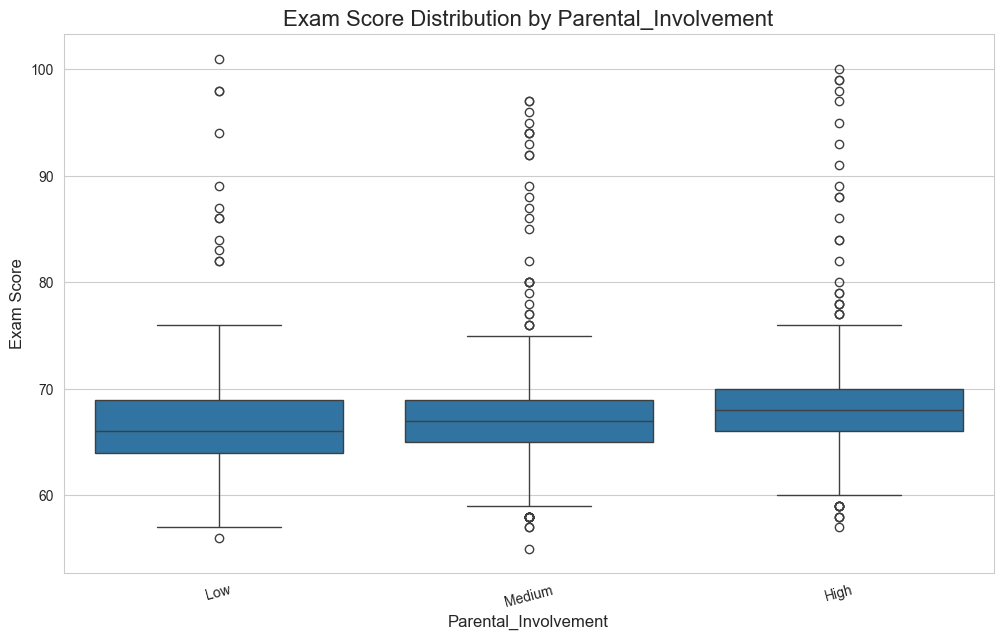

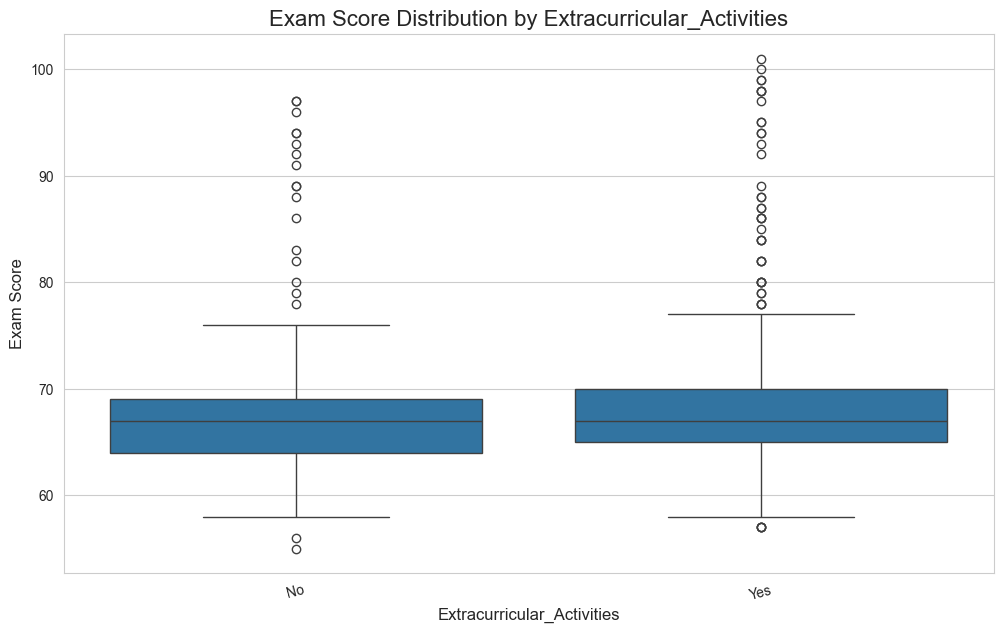

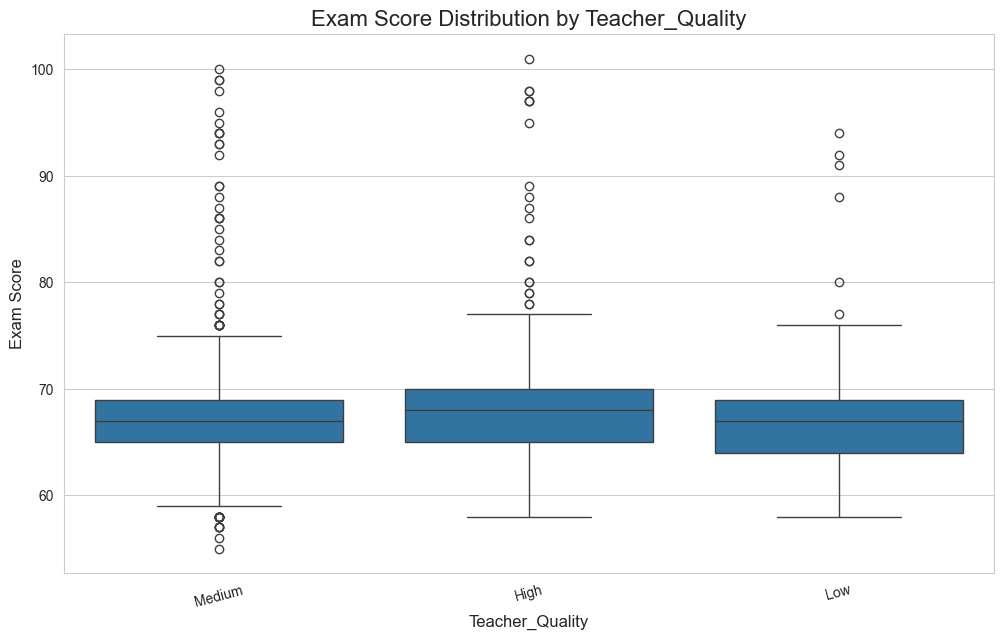

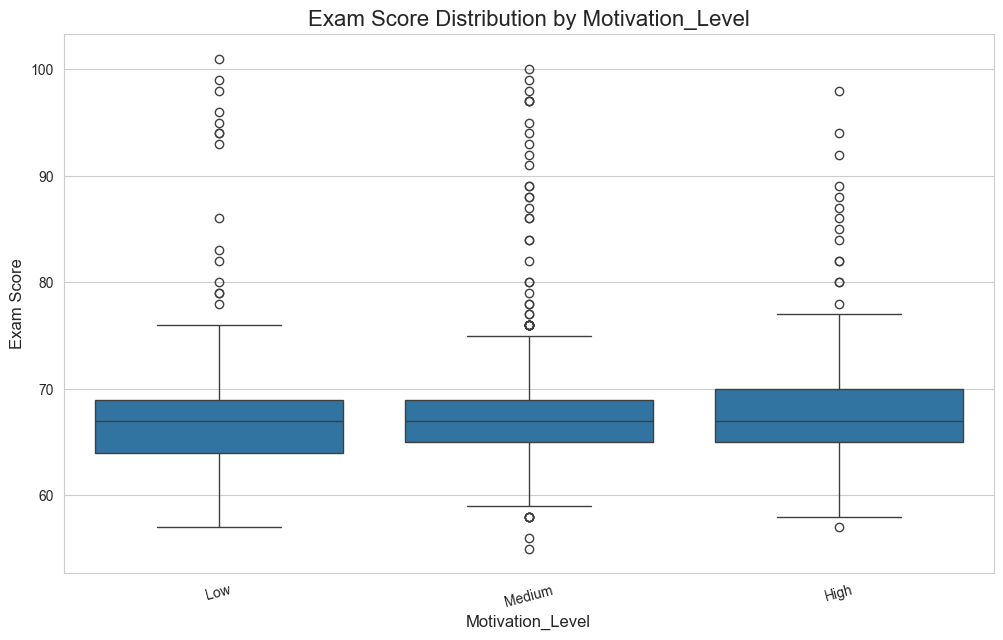

Displaying plot: Correlation Heatmap of Numerical Features...


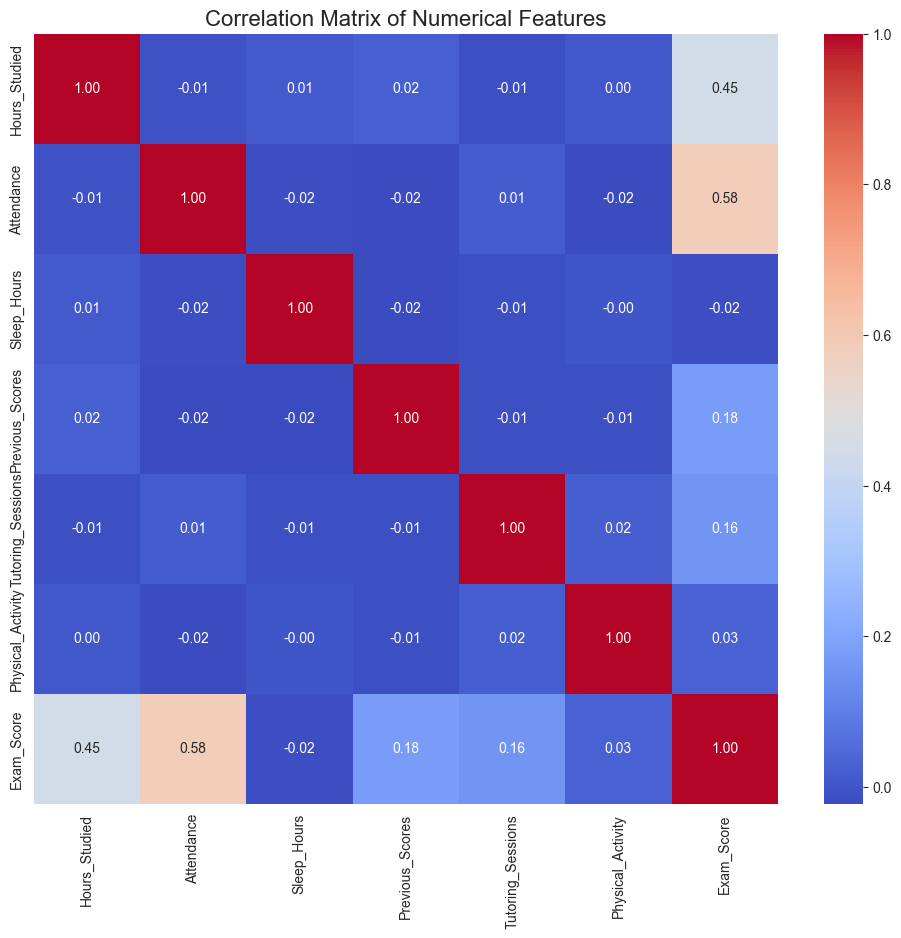


                    EDA COMPLETE



In [5]:
# Section 4: Structured Exploratory Data Analysis (EDA)

print("\n" + "="*50)
print(" " * 5, "EXPLORATORY DATA ANALYSIS (EDA)")
print("="*50 + "\n")

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# --- Part A: Analyze the Target Variable (Exam_Score) ---
print("Displaying plot 1: Distribution of Exam Scores...")
plt.figure(figsize=(10, 6))
sns.histplot(df['Exam_Score'], kde=True, bins=30)
plt.title('Distribution of Exam Scores', fontsize=16)
plt.xlabel('Exam Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# --- Part B: Analyze Numerical Features vs. Target ---
print("Displaying plots for numerical features vs. Exam Score...")
for col in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[col], y=df['Exam_Score'], alpha=0.5)
    plt.title(f'Exam Score vs. {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Exam Score', fontsize=12)
    plt.show()

# --- Part C: Analyze Categorical Features vs. Target ---
print("Displaying plots for categorical features vs. Exam Score...")
# We will only plot a few key categorical features to avoid too many plots.
# You can add or remove features from this list to explore more.
key_categorical_features = [
    'Parental_Involvement',
    'Extracurricular_Activities',
    'Teacher_Quality',
    'Motivation_Level'
]
for col in key_categorical_features:
    plt.figure(figsize=(12, 7))
    # Boxplot is excellent for showing distributions across categories
    sns.boxplot(x=df[col], y=df['Exam_Score'])
    plt.title(f'Exam Score Distribution by {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Exam Score', fontsize=12)
    plt.xticks(rotation=15) # Rotate labels slightly for better readability
    plt.show()

# --- Part D: Correlation Analysis ---
print("Displaying plot: Correlation Heatmap of Numerical Features...")
# We need to re-include the target variable for this analysis
corr_df = df[numerical_features + ['Exam_Score']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

print("\n" + "="*50)
print(" " * 19, "EDA COMPLETE")
print("="*50 + "\n")

In [6]:
# Section 5: Data Preprocessing for Modeling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

print("\n" + "="*50)
print(" " * 8, "PREPARING DATA FOR MODELING")
print("="*50 + "\n")

# 1. Define Features (X) and Target (y)
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

print("Step 1: Separated features (X) and target (y).")
print(f"   Shape of X: {X.shape}")
print(f"   Shape of y: {y.shape}\n")

# 2. Split the data into training and testing sets
# This is a critical step to evaluate the model on unseen data.
# We hold back 20% of the data for testing. random_state ensures reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Step 2: Split data into training (80%) and testing (20%) sets.")
print(f"   Training samples: {X_train.shape[0]}")
print(f"   Testing samples: {X_test.shape[0]}\n")

# 3. Create the preprocessing pipelines for numerical and categorical data
# The numerical pipeline will scale the data.
# The categorical pipeline will one-hot encode the data.

# Re-identify feature types from the training set to avoid data leakage
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include='object').columns.tolist()

# Define the transformers
# StandardScaler for numerical features
numeric_transformer = StandardScaler()

# OneHotEncoder for categorical features. handle_unknown='ignore' prevents errors
# if a category appears in the test set that was not in the training set.
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# 4. Create a ColumnTransformer to apply different transformations to different columns
# This is the master tool that orchestrates the entire preprocessing workflow.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Step 3: Preprocessing pipelines created successfully.")
print("   - Numerical features will be scaled.")
print("   - Categorical features will be one-hot encoded.\n")

print("\n" + "="*50)
print(" " * 12, "PREPROCESSING COMPLETE")
print("="*50 + "\n")


         PREPARING DATA FOR MODELING

Step 1: Separated features (X) and target (y).
   Shape of X: (6607, 19)
   Shape of y: (6607,)

Step 2: Split data into training (80%) and testing (20%) sets.
   Training samples: 5285
   Testing samples: 1322

Step 3: Preprocessing pipelines created successfully.
   - Numerical features will be scaled.
   - Categorical features will be one-hot encoded.


             PREPROCESSING COMPLETE



In [8]:
# Section 6: Building and Training the Linear Regression Model

from sklearn.linear_model import LinearRegression

print("\n" + "="*50)
print(" " * 8, "MODEL TRAINING: LINEAR REGRESSION")
print("="*50 + "\n")

# 1. Create the full machine learning pipeline
# This pipeline chains the preprocessor and the model together.
# 'preprocessor' is the nickname for our first step (the ColumnTransformer).
# 'regressor' is the nickname for our second step (the LinearRegression model).
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

print("Step 1: Created the full model pipeline.")
print("   - Step A: Preprocess the data (Scale & Encode)")
print("   - Step B: Feed processed data to the Linear Regression model\n")


# 2. Train the pipeline on the training data
# When we call .fit() on the pipeline, it intelligently executes all steps in order.
model_pipeline.fit(X_train, y_train)

print("Step 2: Model training complete.")
print("The pipeline has now learned the relationships from the training data.\n")

print("\n" + "="*50)
print(" " * 15, "TRAINING COMPLETE")
print("="*50 + "\n")


         MODEL TRAINING: LINEAR REGRESSION

Step 1: Created the full model pipeline.
   - Step A: Preprocess the data (Scale & Encode)
   - Step B: Feed processed data to the Linear Regression model

Step 2: Model training complete.
The pipeline has now learned the relationships from the training data.


                TRAINING COMPLETE




                MODEL EVALUATION

Step 1: Made predictions on the unseen test data.

Step 2: Calculated performance metrics:
   - R-squared (R²): 0.7696
   - Mean Squared Error (MSE): 3.2560
   - Root Mean Squared Error (RMSE): 1.8044

Step 3: Generating a plot to visualize performance...


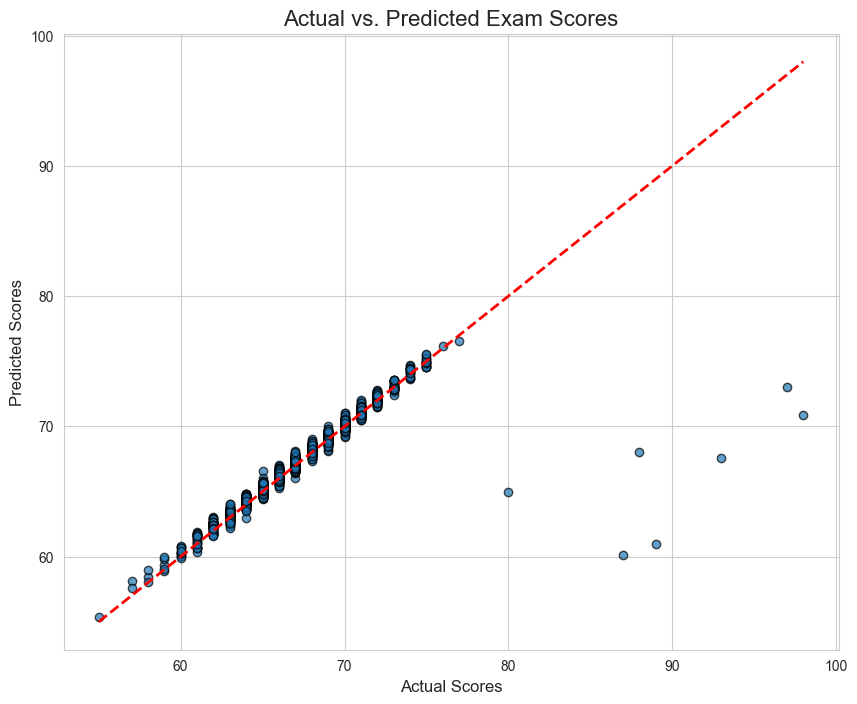


               EVALUATION COMPLETE



In [9]:
# Section 7: Model Evaluation and Visualization

from sklearn.metrics import r2_score, mean_squared_error

print("\n" + "="*50)
print(" " * 15, "MODEL EVALUATION")
print("="*50 + "\n")

# 1. Make predictions on the test data
# The .predict() method on the pipeline automatically runs the full chain:
# raw X_test -> preprocessor -> trained regressor -> predictions
y_pred = model_pipeline.predict(X_test)

print("Step 1: Made predictions on the unseen test data.\n")

# 2. Calculate performance metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Step 2: Calculated performance metrics:")
print(f"   - R-squared (R²): {r2:.4f}")
print(f"   - Mean Squared Error (MSE): {mse:.4f}")
print(f"   - Root Mean Squared Error (RMSE): {rmse:.4f}\n")

# 3. Visualize the results: Actual vs. Predicted
print("Step 3: Generating a plot to visualize performance...")
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2) # Perfect prediction line
plt.title('Actual vs. Predicted Exam Scores', fontsize=16)
plt.xlabel('Actual Scores', fontsize=12)
plt.ylabel('Predicted Scores', fontsize=12)
plt.grid(True)
plt.show()

print("\n" + "="*50)
print(" " * 14, "EVALUATION COMPLETE")
print("="*50 + "\n")

In [10]:
# Section 8 (Bonus): Building and Evaluating a Polynomial Regression Model

from sklearn.preprocessing import PolynomialFeatures

print("\n" + "="*60)
print(" " * 5, "BONUS TASK 1: POLYNOMIAL REGRESSION MODEL")
print("="*60 + "\n")

# 1. Create a new pipeline with an added step for polynomial features
# PolynomialFeatures(degree=2) will create new features that are combinations
# of the originals (e.g., Hours_Studied^2, Hours_Studied * Previous_Scores).
poly_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('regressor', LinearRegression())
])

print("Step 1: Created the polynomial model pipeline (degree=2).\n")

# 2. Train the new, more complex pipeline
poly_model_pipeline.fit(X_train, y_train)
print("Step 2: Polynomial model training complete.\n")

# 3. Make predictions and evaluate the polynomial model
y_poly_pred = poly_model_pipeline.predict(X_test)

# Calculate performance metrics for the polynomial model
poly_r2 = r2_score(y_test, y_poly_pred)
poly_mse = mean_squared_error(y_test, y_poly_pred)
poly_rmse = np.sqrt(poly_mse)

print("Step 3: Calculated performance metrics for the POLYNOMIAL model:")
print(f"   - R-squared (R²): {poly_r2:.4f}")
print(f"   - Mean Squared Error (MSE): {poly_mse:.4f}")
print(f"   - Root Mean Squared Error (RMSE): {poly_rmse:.4f}\n")

print("--- COMPARISON ---")
print(f"Linear Model RMSE:   {rmse:.4f}")
print(f"Polynomial Model RMSE: {poly_rmse:.4f}")

if poly_rmse < rmse:
    print("\nConclusion: The Polynomial model performed BETTER.")
else:
    print("\nConclusion: The simpler Linear model performed BETTER or the same.")

print("\n" + "="*60)
print(" " * 18, "BONUS TASK 1 COMPLETE")
print("="*60 + "\n")


      BONUS TASK 1: POLYNOMIAL REGRESSION MODEL

Step 1: Created the polynomial model pipeline (degree=2).

Step 2: Polynomial model training complete.

Step 3: Calculated performance metrics for the POLYNOMIAL model:
   - R-squared (R²): 0.7471
   - Mean Squared Error (MSE): 3.5745
   - Root Mean Squared Error (RMSE): 1.8906

--- COMPARISON ---
Linear Model RMSE:   1.8044
Polynomial Model RMSE: 1.8906

Conclusion: The simpler Linear model performed BETTER or the same.

                   BONUS TASK 1 COMPLETE




      BONUS TASK 2: FEATURE IMPORTANCE ANALYSIS

Top 10 Most Influential Features:
                      Feature  Coefficient  Absolute_Coefficient
1                  Attendance     2.290405              2.290405
0               Hours_Studied     1.756881              1.756881
10    Access_to_Resources_Low    -1.056906              1.056906
9    Access_to_Resources_High     1.044244              1.044244
6   Parental_Involvement_High     1.023711              1.023711
7    Parental_Involvement_Low    -0.977973              0.977973
3             Previous_Scores     0.705908              0.705908
4           Tutoring_Sessions     0.626224              0.626224
19         Family_Income_High     0.582719              0.582719
27    Peer_Influence_Negative    -0.539524              0.539524

Generating plot for the top 15 most important features...


C:\Users\HP\AppData\Local\Temp\ipykernel_17988\645954549.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


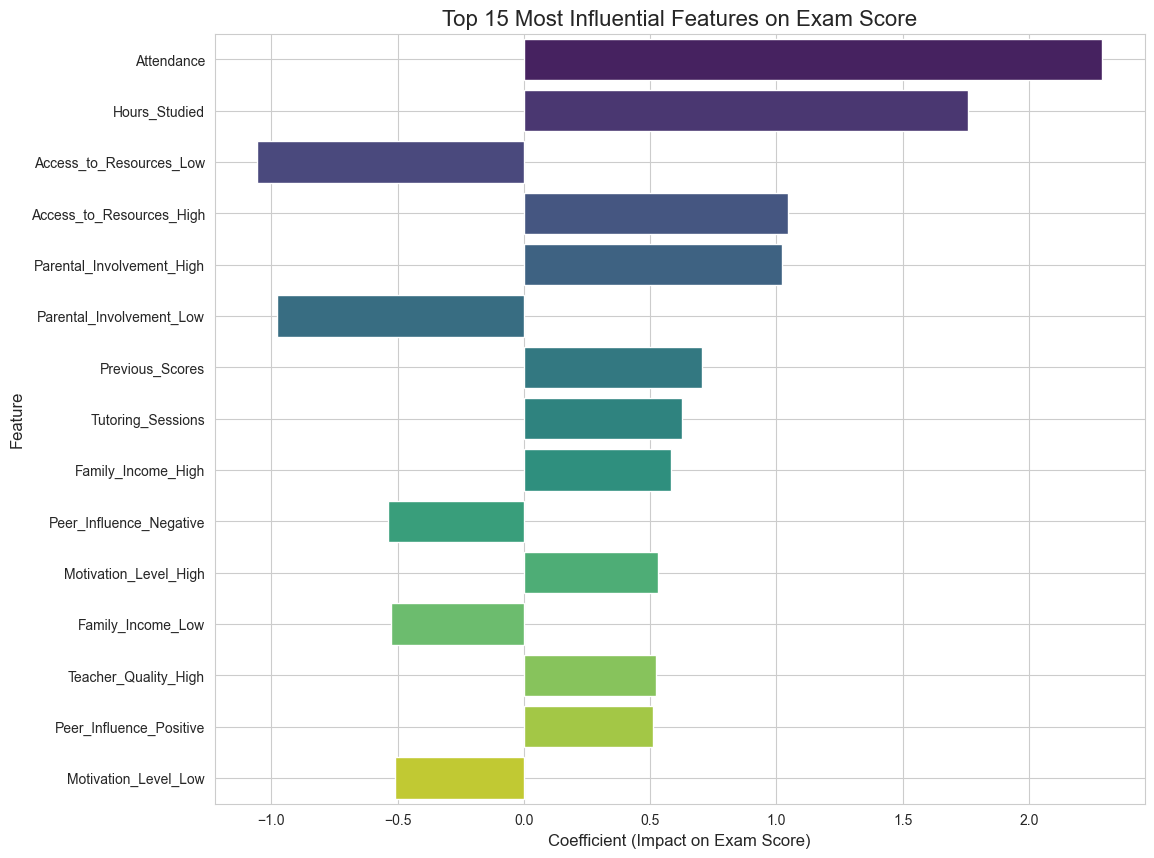


                   BONUS TASK 2 COMPLETE



In [11]:
# Section 9 (Bonus): Feature Importance Analysis

print("\n" + "="*60)
print(" " * 5, "BONUS TASK 2: FEATURE IMPORTANCE ANALYSIS")
print("="*60 + "\n")

# The model pipeline is already trained. We just need to extract the information.

# 1. Get the one-hot encoded feature names from the preprocessor
# The preprocessor is the first step in our trained 'model_pipeline'
preprocessor_step = model_pipeline.named_steps['preprocessor']
categorical_transformer = preprocessor_step.named_transformers_['cat']
one_hot_encoded_feature_names = categorical_transformer.get_feature_names_out(categorical_features)

# Combine with numerical feature names
# All numerical features are at the start, followed by all one-hot encoded features
all_feature_names = np.concatenate([numerical_features, one_hot_encoded_feature_names])

# 2. Get the coefficients from the trained linear regression model
# The regressor is the second step in our trained 'model_pipeline'
regressor_step = model_pipeline.named_steps['regressor']
coefficients = regressor_step.coef_

# 3. Create a DataFrame to view feature importances
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefficients
})

# Add the absolute coefficient for sorting
feature_importance_df['Absolute_Coefficient'] = feature_importance_df['Coefficient'].abs()

# Sort by the absolute value of the coefficient to see the most impactful features
feature_importance_df = feature_importance_df.sort_values(
    by='Absolute_Coefficient',
    ascending=False
)

print("Top 10 Most Influential Features:")
print(feature_importance_df.head(10))

# 4. Visualize the top features
print("\nGenerating plot for the top 15 most important features...")
plt.figure(figsize=(12, 10))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=feature_importance_df.head(15),
    palette='viridis'
)
plt.title('Top 15 Most Influential Features on Exam Score', fontsize=16)
plt.xlabel('Coefficient (Impact on Exam Score)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(True)
plt.show()


print("\n" + "="*60)
print(" " * 18, "BONUS TASK 2 COMPLETE")
print("="*60 + "\n")


      ADVANCED BONUS: GROUPED FEATURE IMPORTANCE

--- Overall Feature Importance (Grouped) ---
                       Feature  Importance
0                   Attendance    2.290405
6          Access_to_Resources    2.101150
15        Parental_Involvement    2.001684
1                Hours_Studied    1.756881
9                Family_Income    1.108291
16              Peer_Influence    1.051673
13            Motivation_Level    1.043881
18             Teacher_Quality    1.015959
14    Parental_Education_Level    0.973648
11             Internet_Access    0.958665
12       Learning_Disabilities    0.857212
7           Distance_from_Home    0.854336
2              Previous_Scores    0.705908
3            Tutoring_Sessions    0.626224
8   Extracurricular_Activities    0.583275
4            Physical_Activity    0.199011
10                      Gender    0.025741
5                  Sleep_Hours    0.018250
17                 School_Type    0.017179

Generating plot for overall feature importa

C:\Users\HP\AppData\Local\Temp\ipykernel_17988\3161177270.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  categorical_importance = categorical_df.groupby('Original_Feature').apply(
C:\Users\HP\AppData\Local\Temp\ipykernel_17988\3161177270.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


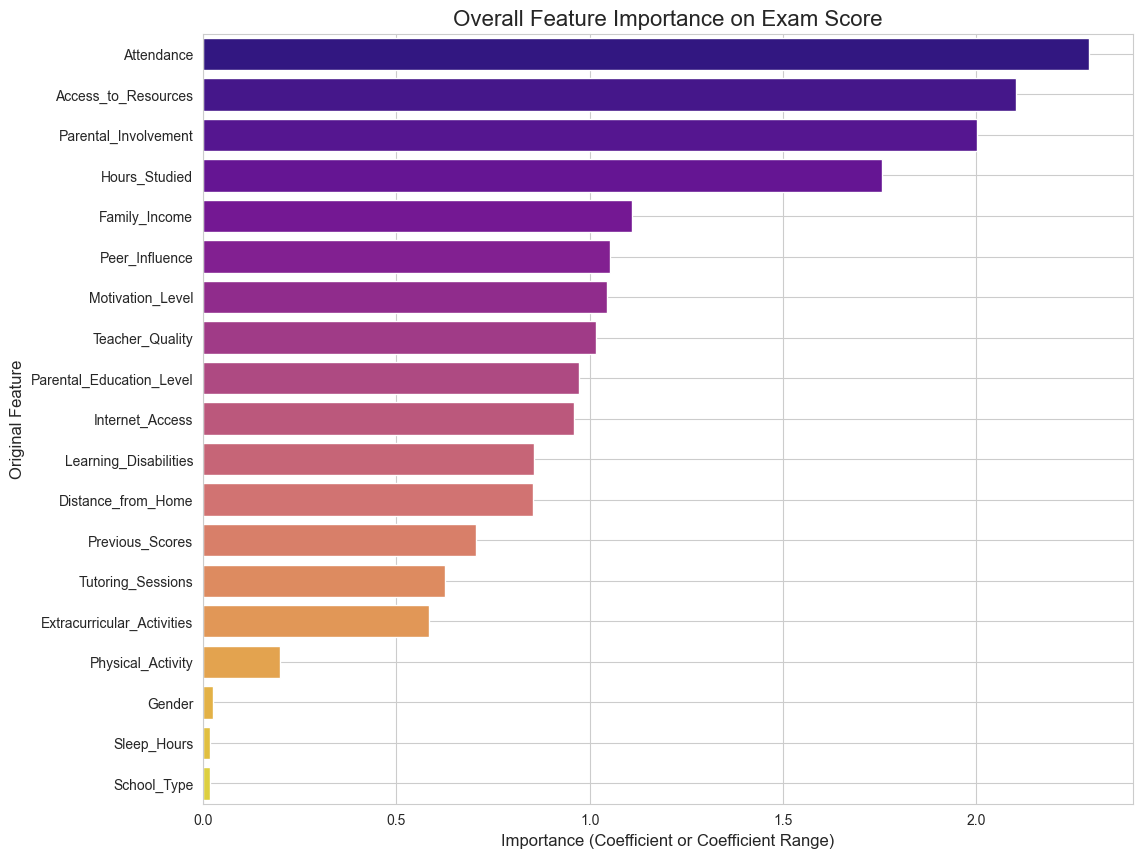


                PROJECT ANALYSIS COMPLETE



In [12]:
# Section 10 (Advanced Bonus): Grouped Feature Importance

print("\n" + "="*60)
print(" " * 5, "ADVANCED BONUS: GROUPED FEATURE IMPORTANCE")
print("="*60 + "\n")

# We already have the feature_importance_df from the previous section

# 1. Calculate importance for NUMERICAL features
# For linear models, the absolute value of the coefficient is the importance.
numerical_importance = feature_importance_df[
    feature_importance_df['Feature'].isin(numerical_features)
][['Feature', 'Absolute_Coefficient']].rename(columns={'Absolute_Coefficient': 'Importance'})

# 2. Calculate importance for CATEGORICAL features
# We will group by the original feature name and calculate the range of coefficients.

# First, extract the original feature name from the one-hot encoded columns
categorical_df = feature_importance_df[
    ~feature_importance_df['Feature'].isin(numerical_features)
].copy() # Use .copy() to avoid SettingWithCopyWarning

# This splits 'Parental_Involvement_High' into 'Parental_Involvement' and 'High'
categorical_df['Original_Feature'] = categorical_df['Feature'].apply(lambda x: '_'.join(x.split('_')[:-1]))

# Now, group by the original feature and calculate the range (max - min) of the coefficients
categorical_importance = categorical_df.groupby('Original_Feature').apply(
    lambda x: x['Coefficient'].max() - x['Coefficient'].min()
).reset_index(name='Importance').rename(columns={'Original_Feature': 'Feature'})


# 3. Combine the two importance DataFrames
final_importance_df = pd.concat([numerical_importance, categorical_importance], ignore_index=True)

# Sort by the final importance metric
final_importance_df = final_importance_df.sort_values(by='Importance', ascending=False)

print("--- Overall Feature Importance (Grouped) ---")
print(final_importance_df)


# 4. Visualize the final grouped importances
print("\nGenerating plot for overall feature importance...")
plt.figure(figsize=(12, 10))
sns.barplot(
    x='Importance',
    y='Feature',
    data=final_importance_df,
    palette='plasma'
)
plt.title('Overall Feature Importance on Exam Score', fontsize=16)
plt.xlabel('Importance (Coefficient or Coefficient Range)', fontsize=12)
plt.ylabel('Original Feature', fontsize=12)
plt.grid(True)
plt.show()

print("\n" + "="*60)
print(" " * 15, "PROJECT ANALYSIS COMPLETE")
print("="*60 + "\n")